# Feature Engineering and Model Building(Logistic Regression)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
#!pip install -U feature-engine
from feature_engine.encoding import OrdinalEncoder as oe
from feature_engine.encoding import OneHotEncoder as ohe
import warnings
warnings.filterwarnings('ignore')

## Handling Missing Values

In [2]:
loans_dataset = pd.read_csv("ProsperLoanDataPostJuly.csv")

In [3]:
loans_dataset.head()

,Unnamed: 0,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1,10273602499503308B223C1,1209647,2014-02-27 08:28:07,36,Current,0.12016,0.0920,0.0820,0.07960,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
1,3,0EF5356002482715299901A,658116,2012-10-22 11:02:35,36,Current,0.12528,0.0974,0.0874,0.08490,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
2,4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39,36,Current,0.24614,0.2085,0.1985,0.18316,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
3,5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37,60,Current,0.15425,0.1314,0.1214,0.11567,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
4,6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56,36,Current,0.31032,0.2712,0.2612,0.23820,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [4]:
missing_values_count = loans_dataset.isnull().sum()
print("Missing values in data",missing_values_count.sum())

Missing values in data 8633


<AxesSubplot:>

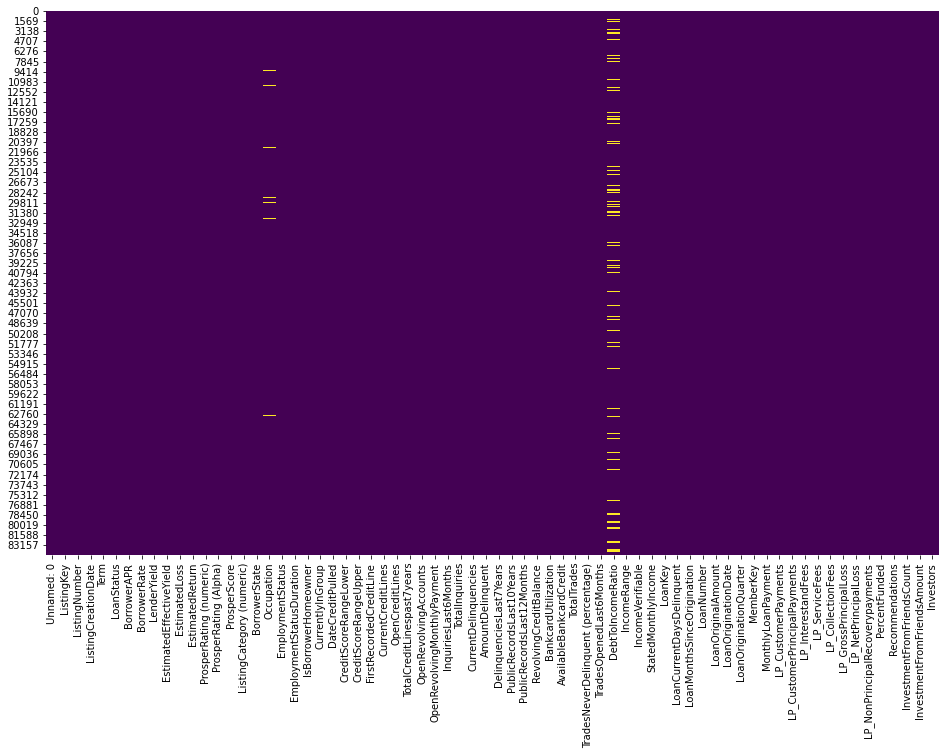

In [5]:
#visualising missing values
plt.figure(figsize=(16,10))
sns.heatmap(loans_dataset.isnull(),cbar=False,cmap='viridis')

In [6]:
loans_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84672 entries, 0 to 84671
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          84672 non-null  int64  
 1   ListingKey                          84672 non-null  object 
 2   ListingNumber                       84672 non-null  int64  
 3   ListingCreationDate                 84672 non-null  object 
 4   Term                                84672 non-null  int64  
 5   LoanStatus                          84672 non-null  object 
 6   BorrowerAPR                         84672 non-null  float64
 7   BorrowerRate                        84672 non-null  float64
 8   LenderYield                         84672 non-null  float64
 9   EstimatedEffectiveYield             84672 non-null  float64
 10  EstimatedLoss                       84672 non-null  float64
 11  EstimatedReturn                     84672

In [7]:
loans_dataset['DebtToIncomeRatio'].fillna(loans_dataset['DebtToIncomeRatio'].mean(), inplace = True)

In [8]:
missing_values_count = loans_dataset.isnull().sum()
print("Missing values in data",missing_values_count.sum())

Missing values in data 1352


<AxesSubplot:>

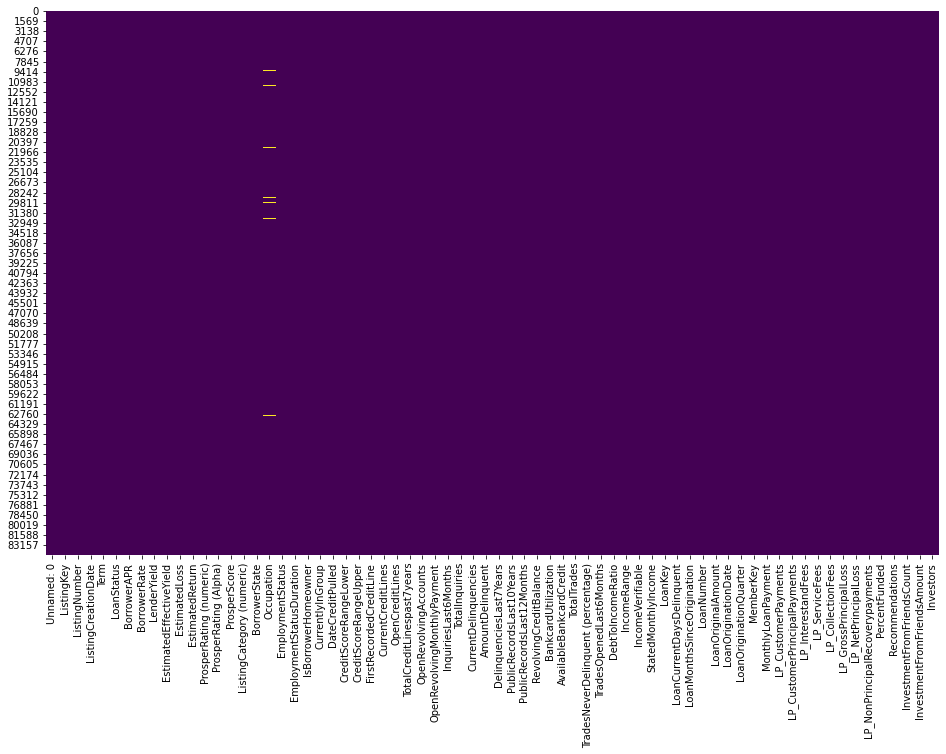

In [9]:
#visualising missing values
plt.figure(figsize=(16,10))
sns.heatmap(loans_dataset.isnull(),cbar=False,cmap='viridis')

In [10]:
loans_dataset = loans_dataset.dropna()

## Feature Engineering for Numerical Variables

In [11]:
loans_dataset = loans_dataset.drop(columns = ['Unnamed: 0'])

In [12]:
cols_with_missed=loans_dataset.columns[loans_dataset.isnull().any()]
num_missed=[col for col in loans_dataset[cols_with_missed].columns if loans_dataset[col].dtypes in ['int64','int32','float64','float32'] ]
print(num_missed)

[]


In [13]:
num_var=[col for col in loans_dataset.columns if loans_dataset[col].dtypes in ['int64','int32','float64','float32'] ]
print(num_var)

['ListingNumber', 'Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatusDuration', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanCurrentDaysDelinquent', 'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees', 'LP_Co

In [14]:
#putting all numerical values in CSV file
#to be easier to decide which feature will be scaled ..

loans_dataset[num_var].to_csv('num.csv')

In [15]:
employ_norm = loans_dataset["EmploymentStatusDuration"]
print(f'EmploymentStatusDuration: {employ_norm.min()} to {employ_norm.max()}')

EmploymentStatusDuration: 0.0 to 755.0


<AxesSubplot:>

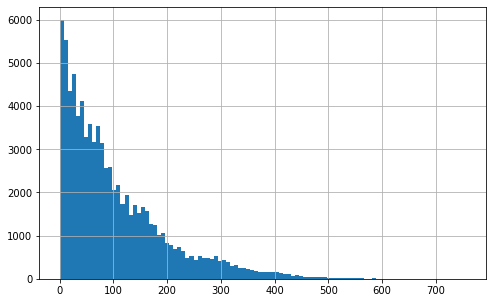

In [16]:
from sklearn.preprocessing import StandardScaler
dfscaled = loans_dataset.copy()
column = 'EmploymentStatusDuration'
#dfscaled[column]=StandardScaler().fit_transform(np.array(dfscaled[column]).reshape(-1,1)) 
dfscaled[column].hist(bins=100, figsize=(8,5))

In [17]:
dfscaled.EmploymentStatusDuration.describe()

count    83326.000000
mean       103.394079
std         96.248527
min          0.000000
25%         31.000000
50%         75.000000
75%        148.000000
max        755.000000
Name: EmploymentStatusDuration, dtype: float64

<AxesSubplot:>

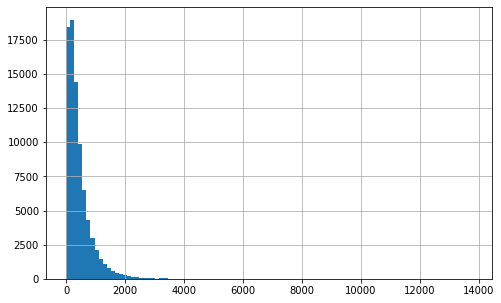

In [18]:
column = 'OpenRevolvingMonthlyPayment'
#dfscaled[column]=StandardScaler().fit_transform(np.array(dfscaled[column]).reshape(-1,1)) 
dfscaled[column].hist(bins=100, figsize=(8,5))

<AxesSubplot:>

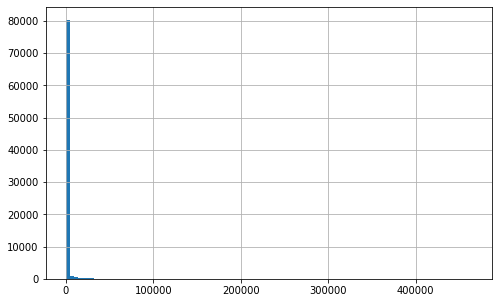

In [19]:
column = 'AmountDelinquent'
#dfscaled[column] =StandardScaler().fit_transform(np.array(dfscaled[column]).reshape(-1,1)) 
dfscaled[column].hist(bins=100, figsize=(8,5))

<AxesSubplot:>

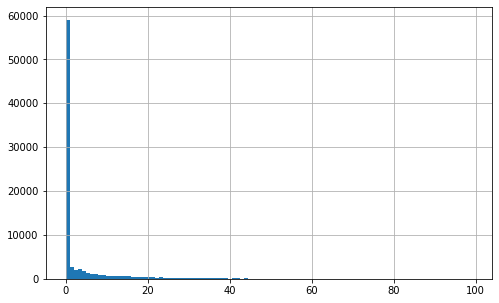

In [20]:
column ='DelinquenciesLast7Years'
#dfscaled[column] =StandardScaler().fit_transform(np.array(dfscaled[column]).reshape(-1,1)) 
dfscaled[column].hist(bins=100, figsize=(8,5))

<AxesSubplot:>

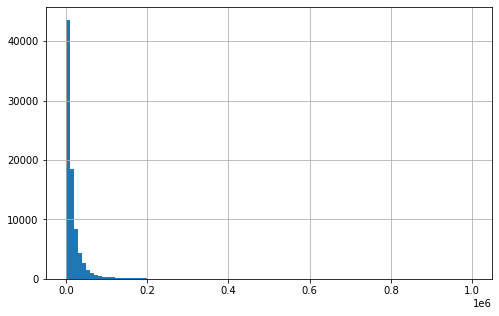

In [21]:
column ='RevolvingCreditBalance'
#dfscaled[column] =StandardScaler().fit_transform(np.array(dfscaled[column]).reshape(-1,1)) 
dfscaled[column].hist(bins=100, figsize=(8,5))

<AxesSubplot:>

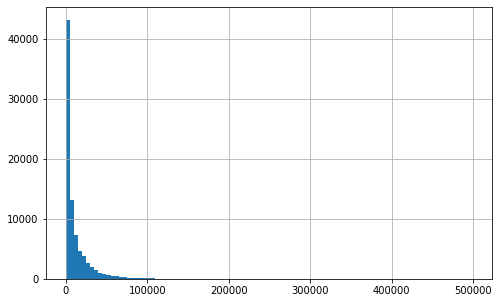

In [22]:
column ='AvailableBankcardCredit'
#dfscaled[column] =StandardScaler().fit_transform(np.array(dfscaled[column]).reshape(-1,1)) 
dfscaled[column].hist(bins=100, figsize=(8,5))

<AxesSubplot:>

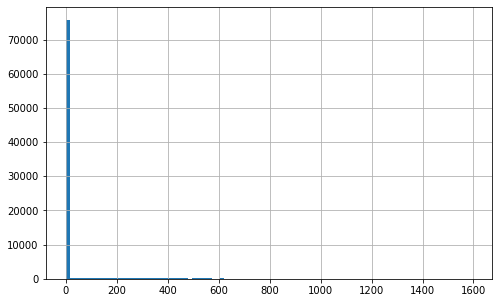

In [23]:
column ='LoanCurrentDaysDelinquent'
#dfscaled[column] =StandardScaler().fit_transform(np.array(dfscaled[column]).reshape(-1,1)) 
dfscaled[column].hist(bins=100, figsize=(8,5))


<AxesSubplot:>

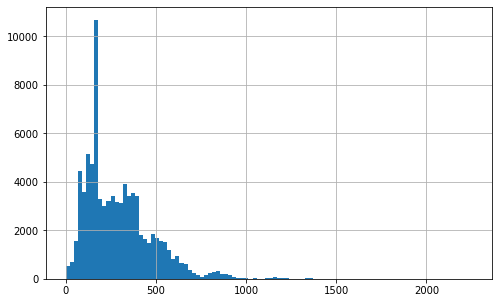

In [24]:
column = 'MonthlyLoanPayment'
#dfscaled[column] =StandardScaler().fit_transform(np.array(dfscaled[column]).reshape(-1,1)) 
dfscaled[column].hist(bins=100, figsize=(8,5))

<AxesSubplot:>

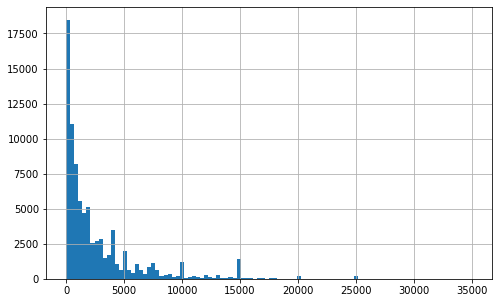

In [25]:
column ='LP_CustomerPrincipalPayments'
#dfscaled[column] =StandardScaler().fit_transform(np.array(dfscaled[column]).reshape(-1,1)) 
dfscaled[column].hist(bins=100, figsize=(8,5))

<AxesSubplot:>

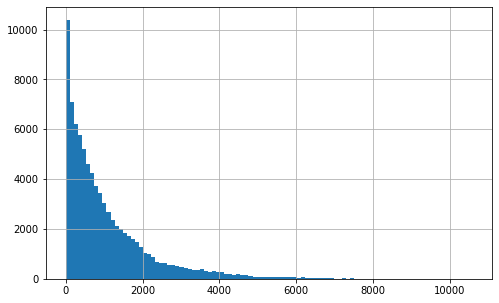

In [26]:
column ='LP_InterestandFees'
#dfscaled[column] =StandardScaler().fit_transform(np.array(dfscaled[column]).reshape(-1,1)) 
dfscaled[column].hist(bins=100, figsize=(8,5))

<AxesSubplot:>

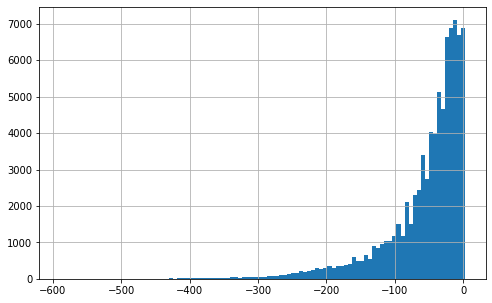

In [27]:
column ='LP_ServiceFees'
#dfscaled[column] =StandardScaler().fit_transform(np.array(dfscaled[column]).reshape(-1,1)) 
dfscaled[column].hist(bins=100, figsize=(8,5))

<AxesSubplot:>

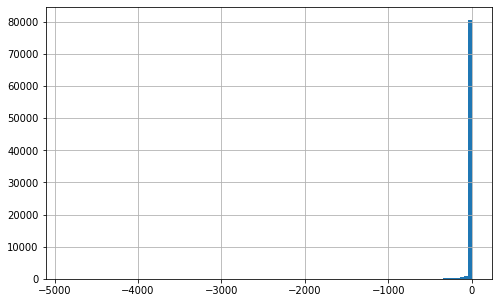

In [28]:
column ='LP_CollectionFees'
#dfscaled[column] =StandardScaler().fit_transform(np.array(dfscaled[column]).reshape(-1,1)) 
dfscaled[column].hist(bins=100, figsize=(8,5))

<AxesSubplot:>

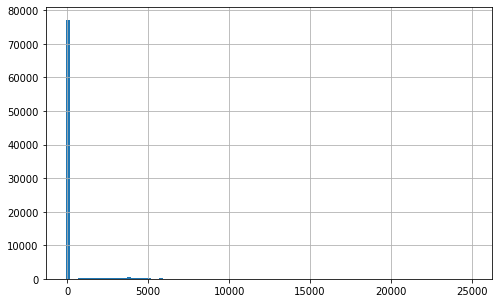

In [29]:
column ='LP_GrossPrincipalLoss'
#dfscaled[column] =StandardScaler().fit_transform(np.array(dfscaled[column]).reshape(-1,1)) 
dfscaled[column].hist(bins=100, figsize=(8,5))

<AxesSubplot:>

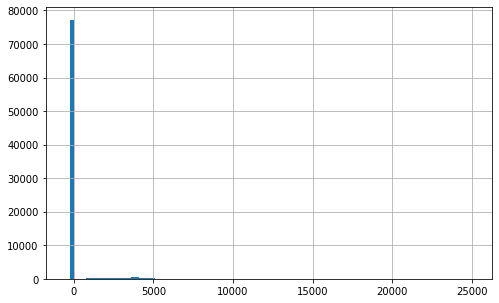

In [30]:
column ='LP_NetPrincipalLoss'
#dfscaled[column] =StandardScaler().fit_transform(np.array(dfscaled[column]).reshape(-1,1)) 
dfscaled[column].hist(bins=100, figsize=(8,5))

<AxesSubplot:>

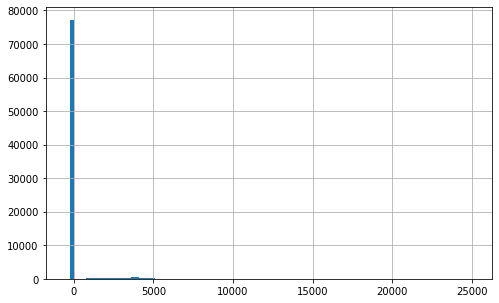

In [31]:
column ='LP_NetPrincipalLoss'
#dfscaled[column] =StandardScaler().fit_transform(np.array(dfscaled[column]).reshape(-1,1)) 
dfscaled[column].hist(bins=100, figsize=(8,5))

<AxesSubplot:>

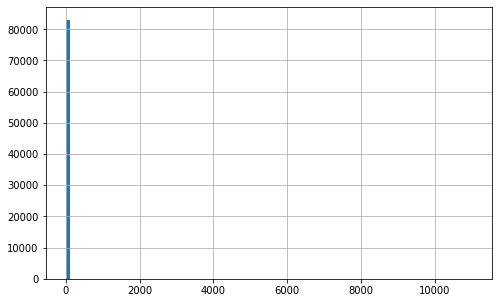

In [32]:
column ='InvestmentFromFriendsAmount'
#dfscaled[column] =StandardScaler().fit_transform(np.array(dfscaled[column]).reshape(-1,1)) 
dfscaled[column].hist(bins=100, figsize=(8,5))

<AxesSubplot:>

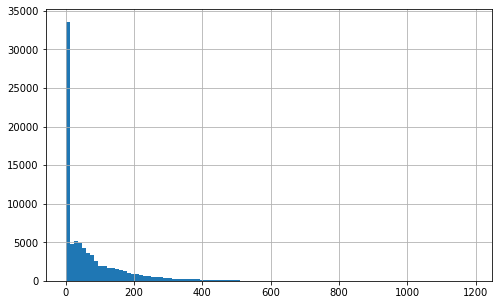

In [33]:
column ='Investors'
#dfscaled[column] =StandardScaler().fit_transform(np.array(dfscaled[column]).reshape(-1,1)) 
dfscaled[column].hist(bins=100, figsize=(8,5))

## Feature Engineering for Categorical Variables

### Select Categorical variables

In [34]:
#select categorical columns 
s=(dfscaled.dtypes=="object")
categorical_variables = list(s[s].index)
categorical_variables

['ListingKey',
 'ListingCreationDate',
 'LoanStatus',
 'ProsperRating (Alpha)',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'DateCreditPulled',
 'FirstRecordedCreditLine',
 'IncomeRange',
 'LoanKey',
 'LoanOriginationDate',
 'LoanOriginationQuarter',
 'MemberKey']

### Investigate those Categoricale Variables 

#####  LoanStatus  

In [35]:
dfscaled.LoanStatus.unique()

array(['Current', 'Past Due (1-15 days)', 'Defaulted', 'Completed',
       'Chargedoff', 'Past Due (16-30 days)', 'Past Due (61-90 days)',
       'Past Due (31-60 days)', 'Past Due (91-120 days)',
       'FinalPaymentInProgress', 'Past Due (>120 days)'], dtype=object)


Since this **"LoanStatus"** variable is our **target variable** in the **Classification model** . Hence, we will not encode it at this stage of **Feature engineering for Categorical variables** ,given that further preprocessing will be done in the **'Modeling '** stage.

##### ProsperRating (Alpha)

In [36]:
dfscaled["ProsperRating (Alpha)"].unique()

array(['A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)


  As we can see this **"ProsperRating (Alpha)"** variable is caracterized with an intrinsic order : **'HR'** is less than **'E'** ,and **'E'** is less than **'D'**,and **'D'** is less than **'C'**, ...etc.

  Thus,it is an **Ordinal variable** .Consequently, we will apply **Orninal Enconding** on it .

##### BorrowerState

In [37]:
dfscaled["BorrowerState"].unique()

array(['CO', 'GA', 'MN', 'NM', 'KS', 'CA', 'IL', 'MD', 'AL', 'AZ', 'VA',
       'FL', 'PA', 'OR', 'NY', 'LA', 'WI', 'OH', 'NC', 'WA', 'MI', 'NV',
       'NJ', 'TX', 'AR', 'SC', 'DE', 'UT', 'DC', 'MA', 'MO', 'CT', 'IN',
       'KY', 'OK', 'MS', 'WV', 'RI', 'TN', 'ID', 'HI', 'NH', 'NE', 'WY',
       'AK', 'MT', 'VT', 'SD'], dtype=object)

As we see ,there is no evidence that this variable has an ordering in its values.Hence it is a **Nominal variable**.

  As for the Encoding , we have two approaches : **'label encoding'** or **'One-Hot Encoding'** . 

In [38]:
#Number of unique values 
len(dfscaled["BorrowerState"].unique())

48

Since the number of categories is significant , we can't use One-Hot Encoding, otherwise we will create 48 additional columns in our dataset !

The Only approache that we can apply here is **'Label Encoding'**

##### Occupation

In [39]:
dfscaled["Occupation"].unique()

array(['Professional', 'Skilled Labor', 'Executive', 'Sales - Retail',
       'Laborer', 'Food Service', 'Fireman', 'Construction',
       'Computer Programmer', 'Other', 'Sales - Commission',
       'Retail Management', 'Engineer - Mechanical', 'Military Enlisted',
       'Clerical', 'Teacher', 'Clergy', 'Attorney', 'Nurse (RN)',
       'Accountant/CPA', 'Analyst', 'Investor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Truck Driver',
       'Administrative Assistant', 'Police Officer/Correction Officer',
       'Social Worker', 'Food Service Management', 'Tradesman - Mechanic',
       'Medical Technician', 'Professor', 'Postal Service',
       'Waiter/Waitress', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping', 'Bus Driver',
       'Engineer - Chemical', 'Doctor', 'Chemist', "Teacher's Aide",
       'Pilot - Private/Commercial', "Nurse's Aide", 'Religious',
       'Ho

The Same thing that we have said about  **"BorrowerState"** applies also here in the **"Occupation"** variable.

We will use here also **'Label Encoding'**

##### EmploymentStatus

In [40]:
dfscaled["EmploymentStatus"].unique()

array(['Employed', 'Other', 'Full-time', 'Self-employed', 'Not employed',
       'Retired', 'Part-time'], dtype=object)

As we remark , "EmploymentStatus" is a "Nominal variable" since there is no obvious ranking in its values.

For Coding approaches , we have here two possibilities :'Label Encoding' and 'One-Hot Encoding'.

Given that there aren't so much categories (7 gategories ) we can use 'One-Hot Encoding'.

##### IncomeRange

In [41]:
dfscaled["IncomeRange"].unique()

array(['$50,000-74,999', '$25,000-49,999', '$100,000+', '$75,000-99,999',
       '$1-24,999', 'Not employed', '$0'], dtype=object)

Rather then using classical approaches , we are going to exploit  the specificity of this variable.

We can use **Regual Expression techniques** to extract the numerical values from each category and then perform the mean of each interval .Finally we will map each categorie with its corresponding numeric mean value .

## Perform Encoding 

### ProsperRating (Alpha)

In [42]:
from sklearn.preprocessing import OrdinalEncoder


ordinal_encoder = OrdinalEncoder()

dfscaled['ProsperRating (Alpha)']= ordinal_encoder.fit_transform( dfscaled.loc[:,['ProsperRating (Alpha)']] )
  
dfscaled['ProsperRating (Alpha)'].unique()

array([0., 4., 2., 5., 3., 1., 6.])

### BorrowerState and Occupation

In [43]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'BorrowerState'.
dfscaled['BorrowerState']= label_encoder.fit_transform( dfscaled['BorrowerState'] )
  
dfscaled['BorrowerState'].unique()

array([ 5, 10, 21, 29, 15,  4, 13, 19,  1,  3, 42,  9, 35, 34, 31, 17, 45,
       32, 25, 44, 20, 30, 28, 40,  2, 37,  8, 41,  7, 18, 22,  6, 14, 16,
       33, 23, 46, 36, 39, 12, 11, 27, 26, 47,  0, 24, 43, 38])

In [44]:
# Encode labels in column 'Occupation'.
dfscaled['Occupation']= label_encoder.fit_transform( dfscaled['Occupation'] )
  
dfscaled['Occupation'].unique()

array([41, 50, 19, 48, 27, 22, 20, 13, 12, 35, 47, 46, 18, 30, 11, 59, 10,
        4, 33,  0,  2, 25, 21, 32, 31, 65,  1, 38, 51, 23, 63, 29, 42, 39,
       66,  9, 36, 62, 49, 14, 17,  3, 28,  6, 16, 15,  8, 60, 37, 34, 45,
       24, 44, 55, 40, 43,  5, 61, 26,  7, 53, 52, 54, 64, 56, 57, 58])

### EmploymentStatus

In [45]:
from sklearn import preprocessing
OH_encoder = preprocessing.OneHotEncoder(handle_unknown='ignore', sparse=False)
encoder_vars_array = OH_encoder.fit_transform(dfscaled.loc[:,["EmploymentStatus"]])

# create object for the feature names using the categorical variables
#encoder_feature_names = one_hot_encoder.get_feature_names(categorical_vars)
Listt = dfscaled.EmploymentStatus.unique()
# create a dataframe to hold the one hot encoded variables
encoder_vars_df = pd.DataFrame(encoder_vars_array, columns = Listt)

# concatenate the new dataframe back to the original input variables dataframe
dfscaled = pd.concat([dfscaled.reset_index(drop=True), encoder_vars_df.reset_index(drop=True)], axis = 1)

# drop the original input 2 and input 3 as it is not needed anymore
dfscaled.drop(columns = ["EmploymentStatus"], axis = 1, inplace = True)
dfscaled.head()


,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,...,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,Employed,Other,Full-time,Self-employed,Not employed,Retired,Part-time
0,10273602499503308B223C1,1209647,2014-02-27 08:28:07,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,...,0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0EF5356002482715299901A,658116,2012-10-22 11:02:35,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,...,0,0.0,158,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,...,0,0.0,20,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0F05359734824199381F61D,1074836,2013-12-14 08:26:37,60,Current,0.15425,0.1314,0.1214,0.11567,0.0449,...,0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0F0A3576754255009D63151,750899,2013-04-12 09:52:56,36,Current,0.31032,0.2712,0.2612,0.23820,0.1275,...,0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### IncomeRange

In [46]:
# change 'Not employed' into '$0' in our data 
dfscaled["IncomeRange"].replace( ['Not employed'] ,'$0', inplace=True)
#checking
unique_values_in_str_dtype = dfscaled["IncomeRange"].unique()
unique_values_in_str_dtype

array(['$50,000-74,999', '$25,000-49,999', '$100,000+', '$75,000-99,999',
       '$1-24,999', '$0'], dtype=object)

In [47]:
dfscaled['IncomeRange']= ordinal_encoder.fit_transform( dfscaled.loc[:,['IncomeRange']] )
  
dfscaled['IncomeRange'].unique()

array([4., 3., 2., 5., 1., 0.])

## Model Building Without feature selection

We will build a baseline model with all the features to see how it compares with model after feature selection and hyperparameter tuning

Since, LoanStatus is our target variable Let's first convert our LoanStatus variable into a binary variable excluding current loans

In [48]:
dfscaled["LoanStatus"].value_counts()

Current                   55268
Completed                 19481
Chargedoff                 5324
Defaulted                   997
Past Due (1-15 days)        798
Past Due (31-60 days)       358
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       264
FinalPaymentInProgress      203
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

What is really of interest to us is what distinguishes **completed loans** from **defaulted loans**. Because there is no way to tell whether **"current"** loans will eventually default or not, we can't use them for our analysis. Nearly half of the dataset is not useful to us, as the loans are still outstanding. In order to be conservative in our eventual estimates, to simplify the problem, and to retain data, let's assume all the "past due" and "chargedoff" loans (and that 1 cancellation) will default. Thus we'll be left with two classes: "completed" and "defaulted". Let's encode those binary outcomes as 1 and 0, respectively.

In [49]:
#Remove outstanding loans

dfmodel = dfscaled[dfscaled["LoanStatus"] != "Current"]

dfmodel["LoanStatus"].value_counts()

Completed                 19481
Chargedoff                 5324
Defaulted                   997
Past Due (1-15 days)        798
Past Due (31-60 days)       358
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       264
FinalPaymentInProgress      203
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [50]:
#Encode all completed loans as 1, and all delinquent, chargedoff, cancelled and defaulted loans as 0

dfmodel["LoanStatus"] = (dfmodel["LoanStatus"] == "Completed").astype(int)

dfmodel["LoanStatus"][:10]

9     0
12    0
18    0
21    1
22    1
25    1
28    1
48    0
54    1
58    1
Name: LoanStatus, dtype: int64

<AxesSubplot:xlabel='LoanStatus', ylabel='count'>

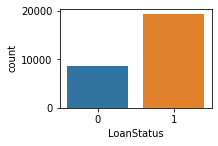

In [51]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
sns.countplot(dfmodel["LoanStatus"])

#### Fixing Data Types

We will convert all the boolean values to 0's and 1's

In [52]:
dfmodel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28058 entries, 9 to 83324
Data columns (total 75 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ListingKey                          28058 non-null  object 
 1   ListingNumber                       28058 non-null  int64  
 2   ListingCreationDate                 28058 non-null  object 
 3   Term                                28058 non-null  int64  
 4   LoanStatus                          28058 non-null  int64  
 5   BorrowerAPR                         28058 non-null  float64
 6   BorrowerRate                        28058 non-null  float64
 7   LenderYield                         28058 non-null  float64
 8   EstimatedEffectiveYield             28058 non-null  float64
 9   EstimatedLoss                       28058 non-null  float64
 10  EstimatedReturn                     28058 non-null  float64
 11  ProsperRating (numeric)             28058

In [53]:
dfmodel["IsBorrowerHomeowner"] = dfmodel["IsBorrowerHomeowner"].astype(int)
dfmodel["IncomeVerifiable"] = dfmodel["IncomeVerifiable"].astype(int)
dfmodel["CurrentlyInGroup"] = dfmodel["CurrentlyInGroup"].astype(int)
dfmodel["IsBorrowerHomeowner"][:10], dfmodel["IncomeVerifiable"][:10], dfmodel["CurrentlyInGroup"][:10]

(9     0
 12    1
 18    0
 21    0
 22    1
 25    0
 28    0
 48    1
 54    0
 58    0
 Name: IsBorrowerHomeowner, dtype: int64,
 9     1
 12    1
 18    1
 21    1
 22    1
 25    1
 28    1
 48    1
 54    1
 58    1
 Name: IncomeVerifiable, dtype: int64,
 9     0
 12    0
 18    0
 21    0
 22    0
 25    0
 28    0
 48    0
 54    0
 58    0
 Name: CurrentlyInGroup, dtype: int64)

The length of credit history could potentially be a very powerful feature. Let's try turning this variable into a "YearsWithCredit" variable that will take continuous integer values rather than being a datetime object. This data comes from 2014, so let's compare the earliest recorded credit lines to 2014.

In [54]:
first_credit_year = dfmodel["FirstRecordedCreditLine"].str[:4]

dfmodel["YearsWithCredit"] = 2014 - pd.to_numeric(first_credit_year)

dfmodel.drop("FirstRecordedCreditLine", axis=1, inplace=True)

dfmodel["YearsWithCredit"][:10]

9     18
12    15
18    16
21    39
22    14
25    26
28    11
48    22
54    14
58    15
Name: YearsWithCredit, dtype: int64

Finally lets drop redundant and irrelevant columns such as ids

In [55]:
dfmodel.drop(["ListingKey", "ListingNumber", "LoanKey", "LoanNumber"], axis=1, inplace=True)

Dropping variables which would be useful for other research questions

In [56]:
dfmodel.drop(["ListingCreationDate", "DateCreditPulled", "LoanOriginationDate", "LoanOriginationQuarter", "MemberKey"], 
        axis=1, inplace=True)

In [57]:
base_features=['LoanCurrentDaysDelinquent','LP_CustomerPrincipalPayments','LP_GrossPrincipalLoss','LP_CustomerPayments','LP_InterestandFees','LP_ServiceFees','MonthlyLoanPayment','AvailableBankcardCredit','RevolvingCreditBalance']

## Final Model Building

Since, our baseline model performed the best we will build the final model according to it

In [58]:
from sklearn.model_selection import train_test_split
y = dfmodel.pop("LoanStatus")
X = dfmodel[base_features]
#Let’s split X and y using Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.8)
#get shape of train and test data
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (22446, 9)
train size y :  (22446,)
test size X :  (5612, 9)
test size y :  (5612,)


In [59]:
from sklearn.pipeline import Pipeline ,FeatureUnion
from sklearn.impute import SimpleImputer
#building a pipeline for a numerical features
num_pipeline = Pipeline(steps=[
                        ('imputer',SimpleImputer(strategy='median')),
                        ('scaler',StandardScaler())
                    ])

## deal with (num_pipline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train = num_pipeline.fit_transform(X_train)  ## train
X_test = num_pipeline.transform(X_test)  ## test

In [60]:
pd.set_option("display.max_columns", None)

In [62]:
X_train

array([[-0.44704515,  0.01922881, -0.39837793, ..., -0.46479992,
        -0.47489506, -0.46945782],
       [-0.44704515,  2.71385247, -0.39837793, ...,  2.03089117,
         0.41948845,  0.11683926],
       [ 0.63609904, -0.99861761,  1.35932156, ..., -0.19157922,
         0.15661563, -0.48578071],
       ...,
       [ 3.42015027, -0.99550013,  0.28010097, ..., -0.88200733,
        -0.53008728, -0.50688104],
       [-0.44704515,  0.74470234, -0.39837793, ...,  0.23996785,
         0.01697497,  0.65274106],
       [-0.44704515, -0.18805201, -0.39837793, ..., -0.42142687,
        -0.4757612 ,  0.21185707]])

In [63]:
from sklearn.linear_model import LogisticRegression
lr_final =LogisticRegression(class_weight={0:0.6,1:0.4})
# train model to learn relationships between input and output variables
lr_final.fit(X_train,y_train)

LogisticRegression(class_weight={0: 0.6, 1: 0.4})

In [64]:
y_pred_finalmodel = lr_final.predict(X_test)

In [65]:
from sklearn.metrics import f1_score
print("f1 score for base model is : " , f1_score(y_test,y_pred_finalmodel))

f1 score for base model is :  0.9957490660827


In [66]:
print('Train Accuracy-Score of Logistic Regression: {}'.format(lr_final.score(X_train, y_train)))
print('Test  Accuracy-Score of Logistic Regression: {}'.format(lr_final.score(X_test, y_test)))

Train Accuracy-Score of Logistic Regression: 0.9927826784282278
Test  Accuracy-Score of Logistic Regression: 0.9941197434069851


In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
y_pred_prob_test = lr_final.predict_proba(X_test)[:, 1]
#predict labels on test dataset
y_pred_test = lr_final.predict(X_test)
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("confusion Matrix is :",cm)
print("n")
# ROC- AUC score
print("ROC-AUC score  test dataset:  ", roc_auc_score(y_test,y_pred_prob_test))
#Precision score
print("precision score  test dataset:  ", precision_score(y_test,y_pred_test))
#Recall Score
print("Recall score  test dataset:  ", recall_score(y_test,y_pred_test))
#f1 score
print("f1 score  test dataset :  ", f1_score(y_test,y_pred_test))

confusion Matrix is : [[1714   32]
 [   1 3865]]
n
ROC-AUC score  test dataset:   0.995817503788128
precision score  test dataset:   0.9917885552989479
Recall score  test dataset:   0.9997413347128815
f1 score  test dataset :   0.9957490660827


In [68]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1746
           1       0.99      1.00      1.00      3866

    accuracy                           0.99      5612
   macro avg       1.00      0.99      0.99      5612
weighted avg       0.99      0.99      0.99      5612



The classification report shows that our model has precision and recall extremely close to 1 thus showing that our model performs well

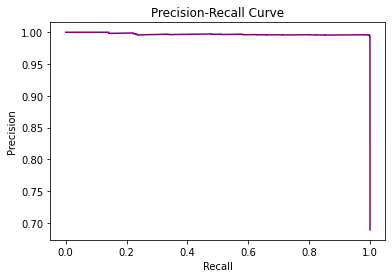

In [69]:
from sklearn.metrics import precision_recall_curve
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_test)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

The precision recall curve is also very close to perfect

In [70]:
base_features.append('LoanStatus')
loans_dataset[base_features]

,LoanCurrentDaysDelinquent,LP_CustomerPrincipalPayments,LP_GrossPrincipalLoss,LP_CustomerPayments,LP_InterestandFees,LP_ServiceFees,MonthlyLoanPayment,AvailableBankcardCredit,RevolvingCreditBalance,LoanStatus
0,0,0.00,0.0,0.0000,0.0000,0.00,318.93,10266.0,3989.0,Current
1,0,4091.09,0.0,5143.2000,1052.1100,-108.01,321.45,30754.0,1444.0,Current
2,0,1563.22,0.0,2819.8500,1256.6300,-60.27,563.97,695.0,6193.0,Current
3,0,351.89,0.0,679.3400,327.4500,-25.33,342.37,86509.0,62999.0,Current
4,0,604.25,0.0,1226.7000,622.4500,-22.95,122.67,1929.0,5812.0,Current
...,...,...,...,...,...,...,...,...,...,...
84667,0,2238.38,0.0,3647.4000,1409.0200,-75.58,364.74,1886.0,7714.0,Current
84668,0,1997.16,0.0,2330.5500,333.3900,-30.05,65.57,6658.0,15743.0,FinalPaymentInProgress
84669,0,183.15,0.0,546.7000,363.5500,-16.91,273.35,7853.0,22147.0,Current
84670,0,15000.00,0.0,21122.5600,6122.5600,-235.05,449.55,4137.0,11956.0,Completed


In [71]:
import os,joblib
joblib.dump(lr_final,'model_LR.pkl')

['model_LR.pkl']

In [72]:
loaded_model = joblib.load('model_LR.pkl')
loaded_model

LogisticRegression(class_weight={0: 0.6, 1: 0.4})

In [73]:
print('Train Accuracy-Score of Logistic Regression: {}'.format(loaded_model.score(X_train, y_train)))
print('Test  Accuracy-Score of Logistic Regression: {}'.format(loaded_model.score(X_test, y_test)))

Train Accuracy-Score of Logistic Regression: 0.9927826784282278
Test  Accuracy-Score of Logistic Regression: 0.9941197434069851


In [79]:
X

,LoanCurrentDaysDelinquent,LP_CustomerPrincipalPayments,LP_GrossPrincipalLoss,LP_CustomerPayments,LP_InterestandFees,LP_ServiceFees,MonthlyLoanPayment,AvailableBankcardCredit,RevolvingCreditBalance
9,3,88.64,0.00,135.8174,47.1774,-3.40,137.39,3626.0,8624.0
12,140,209.75,3790.25,521.1300,311.3800,-9.81,173.71,178.0,9103.0
18,193,117.73,1882.27,236.0100,118.2800,-4.89,78.67,607.0,7975.0
21,0,4000.00,0.00,4725.3500,725.3500,-25.81,124.76,3619.0,2033.0
22,0,4000.00,0.00,4594.4800,594.4800,-64.62,0.00,30794.0,7246.0
...,...,...,...,...,...,...,...,...,...
83310,0,8000.00,0.00,9337.3400,1337.3400,-129.82,259.27,24505.0,36443.0
83317,0,2000.00,0.00,2083.6200,83.6200,-4.41,73.30,3746.0,4.0
83318,0,2500.00,0.00,2672.5800,172.5800,-6.54,101.25,7537.0,1109.0
83322,0,1997.16,0.00,2330.5500,333.3900,-30.05,65.57,6658.0,15743.0


In [75]:
X.to_csv("X.csv",index=False)
y.to_csv("y.csv",index=False)

In [77]:
y

9        0
12       0
18       0
21       1
22       1
        ..
83310    1
83317    1
83318    1
83322    0
83324    1
Name: LoanStatus, Length: 28058, dtype: int64